# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [4]:
# Sua análise da parte 1 começa aqui.
print(dataframe.normal.describe(),"\n")
print(dataframe.binomial.describe())

count    10000.000000
mean        19.991456
std          4.013850
min          4.310399
25%         17.309638
50%         19.989620
75%         22.684324
max         35.704951
Name: normal, dtype: float64 

count    10000.000000
mean        20.097000
std          4.041191
min          6.000000
25%         17.000000
50%         20.000000
75%         23.000000
max         36.000000
Name: binomial, dtype: float64


## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [5]:
def q1():
    a=float(dataframe.normal.quantile(0.25)-dataframe.binomial.quantile(0.25))
    b=float(dataframe.normal.quantile(0.50)-dataframe.binomial.quantile(0.50))
    c=float(dataframe.normal.quantile(0.75)-dataframe.binomial.quantile(0.75))
    a=round(a,3)
    b=round(b,3)
    c=round(c,3)
    return (a,b,c)
    # Retorne aqui o resultado da questão 1.
q1()   

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [6]:
m=dataframe.normal.mean()
s=dataframe.normal.std()

In [7]:
ecdf = ECDF(dataframe["normal"])

In [8]:
ecdf(m+s)-ecdf(m-s)

0.6838

In [9]:
df = dataframe[(dataframe["normal"]<m+s) & (dataframe["normal"]>m-s)]

In [10]:
print("CDF para [ẍ−𝑠,ẍ+𝑠]: ",len(df)/len(dataframe))

CDF para [ẍ−𝑠,ẍ+𝑠]:  0.6838


In [11]:
def q2():
    media=dataframe.normal.mean()
    sd=dataframe.normal.std()
    
    x1=media-sd
    x2=media+sd
    
    f = ECDF(dataframe["normal"])
    
    cdf = f(x2)-f(x1)
    
    return round(float(cdf),3)
q2()

0.684

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

In [12]:
df = dataframe[(dataframe["normal"]<=m+s*2) & (dataframe["normal"]>=m-s*2)]
print("CDF para [ẍ−2𝑠,ẍ+2𝑠]: ",len(df)/len(dataframe))
df = dataframe[(dataframe["normal"]<=m+s*3) & (dataframe["normal"]>=m-s*3)]
print("CDF para [ẍ−3𝑠,ẍ+3𝑠]: ",len(df)/len(dataframe))

CDF para [ẍ−2𝑠,ẍ+2𝑠]:  0.9538
CDF para [ẍ−3𝑠,ẍ+3𝑠]:  0.9973


## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [13]:
m_binom=dataframe.binomial.mean()
v_binom=dataframe.binomial.var()
m_norm=dataframe.normal.mean()
v_norm=dataframe.normal.var()

In [14]:
print("m_binom:",m_binom,"\nm_norm:\t",m_norm,"\nv_binom:",v_binom,"\nv_norm:\t",v_norm)

m_binom: 20.097 
m_norm:	 19.991456066526293 
v_binom: 16.331224122412237 
v_norm:	 16.110987985368915


In [15]:
print((m_binom-m_norm,v_binom-v_norm))

(0.10554393347370805, 0.22023613704332234)


In [16]:
print(v_binom)
print(dataframe.binomial.std()**2)

16.331224122412237
16.331224122412237


In [17]:
def q3():
    m_binom=dataframe.binomial.mean()
    v_binom=dataframe.binomial.var()
    m_norm=dataframe.normal.mean()
    v_norm=dataframe.normal.var()
    x1=round(float(m_binom-m_norm),3)
    x2=round(float(v_binom-v_norm),3)
    return (float(x1),float(x2))
q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

In [18]:
pd.DataFrame(sct.binom.rvs(1000, 0.2, size=10000)).describe()

0
count  10000.000000
mean     200.061000
std       12.394791
min      151.000000
25%      192.000000
50%      200.000000
75%      208.000000
max      251.000000

## Parte 2

### _Setup_ da parte 2

In [19]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [20]:
# Sua análise da parte 2 começa aqui.
stars

mean_profile  sd_profile  kurt_profile  skew_profile  mean_curve  \
0        102.507812   58.882430      0.465318     -0.515088    1.677258   
1        103.015625   39.341649      0.323328      1.051164    3.121237   
2        136.750000   57.178449     -0.068415     -0.636238    3.642977   
3         88.726562   40.672225      0.600866      1.123492    1.178930   
4         93.570312   46.698114      0.531905      0.416721    1.636288   
...             ...         ...           ...           ...         ...   
17892    136.429688   59.847421     -0.187846     -0.738123    1.296823   
17893    122.554688   49.485605      0.127978      0.323061   16.409699   
17894    119.335938   59.935939      0.159363     -0.743025   21.430602   
17895    114.507812   53.902400      0.201161     -0.024789    1.946488   
17896     57.062500   85.797340      1.406391      0.089520  188.306020   

        sd_curve  kurt_curve  skew_curve  target  
0      14.860146   10.576487  127.393580   False  
1      21.744669    7.735822   63.171909   False  
2      20.959280    6.896499   53.593661   False  
3      11.468720   14.269573  252.567306   False  
4      14.545074   10.621748  131.394004   False  
...          ...         ...         ...     ...  
17892  12.166062   15.450260  285.931022   False  
17893  44.626893    2.945244    8.297092   False  
17894  58.872000    2.499517    4.595173   False  
17895  13.381731   10.007967  134.238910   False  
17896  64.712562   -1.597527    1.429475   False  

[17897 rows x 9 columns]

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [21]:
mean_profile = stars[stars["target"]==0]["mean_profile"]

In [22]:
m=mean_profile.mean()
s=mean_profile.std()

In [23]:
false_pulsar_mean_profile_standardized = (mean_profile-m)/s

In [24]:
false_pulsar_mean_profile_standardized

0       -0.804181
1       -0.775123
2        1.155263
3       -1.592787
4       -1.315613
           ...   
17892    1.136934
17893    0.342963
17894    0.158776
17895   -0.117504
17896   -3.404704
Name: mean_profile, Length: 16258, dtype: float64

In [25]:
sct.norm.ppf(0.8)

0.8416212335729143

In [26]:
sct.norm.ppf(0.9)

1.2815515655446004

In [27]:
sct.norm.ppf(0.95)

1.6448536269514722

In [28]:
stars["false_pulsar_mean_profile_standardized"]=false_pulsar_mean_profile_standardized

In [29]:
f = ECDF(false_pulsar_mean_profile_standardized)
q80 = sct.norm.ppf(0.8)
q90 = sct.norm.ppf(0.9)
q95 = sct.norm.ppf(0.95)
f([q80, q90, q95])

array([0.80557264, 0.91056711, 0.95878952])

In [30]:
def q4():
    f = ECDF(false_pulsar_mean_profile_standardized)
    q80 = sct.norm.ppf(0.8)
    q90 = sct.norm.ppf(0.9)
    q95 = sct.norm.ppf(0.95)
    return tuple(f([q80, q90, q95]).round(3))
q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

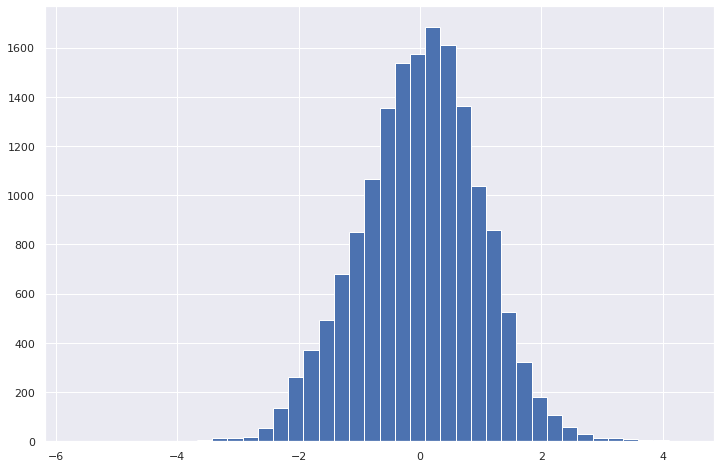

In [31]:
false_pulsar_mean_profile_standardized.hist(bins=40)

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [33]:
def q5():
    f_m_s = stars["false_pulsar_mean_profile_standardized"].quantile([0.25,0.50,0.75])
    q1 = sct.norm.ppf(q = 0.25, loc = 0, scale = 1)
    q2 = sct.norm.ppf(q = 0.50, loc = 0, scale = 1)
    q3 = sct.norm.ppf(q = 0.75, loc = 0, scale = 1)
    n_q = (q1,q2,q3)
    
    return tuple((f_m_s-n_q).round(3))
q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.